# Homework 8

# Feature Selection and Dimention Reduction. PCA

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gender Recognition by Voice

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

The following acoustic properties of each voice are measured and included within the CSV:

* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label: male or female

In [2]:
# Read data sample
data = pd.read_csv("https://www.dropbox.com/scl/fi/2gpi4tivaetc2z217d6ch/voice.csv?rlkey=xr4qslh9fmao94aiyimwcdkd2&dl=1")
print("DataFrame shape: ", data.shape)
data.head()

DataFrame shape:  (3168, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Data Preparation


In [3]:
# Get feature names
feature_names = data.columns.drop(['label'])
print("Feature names: ", feature_names)

Feature names:  Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')


In [4]:
# Prepare X and y
X = data[feature_names].values
y = 1. * (data['label'].values == 'male')

## Train / Test Split + Standardization

We perform standartization to provide you possibility to use any classifier you know without any difficulties induced by feature scales. 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardization
ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Classifier Selection

Generally, tasks below can be done with any classifier, but we ask you to provide answers with Decision Tree classifier with the following hyperparameters (don't touch this):

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Task 1 (1 point)

Find just **one** feature, that provides the best classification accuracy. What is the name of this feature? Save name in variable first_best_feature and go through assert

Hint: in **for** loop use one feature in the sample to train the classifier. Then, calculate the classification accuracy on the test sample.

In [25]:
from sklearn.metrics import accuracy_score

first_best_feature = ""
max_accuracy = -1
for i, feature in enumerate(feature_names):                 #looping through features
    clf.fit(X_train[:, i].reshape(-1, 1), y_train)          
    y_pred = clf.predict(X_test[:, i].reshape(-1, 1))
    accuracy = accuracy_score(y_test, y_pred)               #fitting the data and calculation the accuracy
    if max_accuracy == -1 or accuracy > max_accuracy:       #comparing with the maximum accuracy
        max_accuracy = accuracy
        first_best_feature = feature
        first_best_feature_index = i
print(f"Best feature: {first_best_feature}, with accuracy: {max_accuracy:.3f}")

Best feature: meanfun, with accuracy: 0.935


In [26]:
assert(first_best_feature == 'meanfun')

# Task 2 (1 point)

Now you know the first best feature of the sample. In this task you need to find the second best feature. What are the names of these features?

Save answer in variables first_best_feature and second_best_feature and go through assert

Hint: in **for** loop use **two** features to train the classifier. One of the two features is the found best feature from Task 1, the second feature is a new one. 

In [28]:
second_best_feature = ""
max_accuracy = -1
for i, feature in enumerate(feature_names):                            #looping through features 
    if feature == first_best_feature:                                  #if we are on the first best feature, skip it
        continue
    clf.fit(X_train[:, [first_best_feature_index, i]], y_train)        #same as before
    y_pred = clf.predict(X_test[:, [first_best_feature_index, i]])
    accuracy = accuracy_score(y_test, y_pred)
    if max_accuracy == -1 or accuracy > max_accuracy:
        max_accuracy = accuracy
        second_best_feature = feature
        second_best_feature_index = i
print(f"Second best feature: {second_best_feature}, with accuracy: {max_accuracy:.3f}")

Second best feature: Q75, with accuracy: 0.960


In [29]:
assert(first_best_feature == 'meanfun' and second_best_feature == 'Q75')

# Task 3 (3 points)

Great! As you can guess, now your task is to find the best 3 features, the best 4 features, ...., the best 20 features :) Use the silimilar approach as in Task 2.

For the each N best features calculate the classification accuracy. Plot dependency of the accuracy from N. Print list of the following pairs of values: (Name of the N-th best feature, accuracy).

The output example:

In [48]:
n_best_features = []
n_best_names = []
n_best_accuracies = []


for i in range(1, len(feature_names)+1):
    n_best_accuracies.append(None)                                          #setting the last item of each list as None
    n_best_features.append(None)
    n_best_names.append(None)
    for i, feature in enumerate(feature_names):         
        if feature in n_best_names:                                         #skip features already considered
            continue
        sample_indices = n_best_features[:-1] + [i]     
        X_train_sample = X_train[:, sample_indices]
        X_test_sample = X_test[:, sample_indices]
        if X_train_sample.shape[1] == 1: X_train_sample.reshape(-1, 1)  
        if X_test_sample.shape[1] == 1: X_test_sample.reshape(-1, 1)        #selecting features and reshaping the data if needed

        clf.fit(X_train_sample, y_train)                                    
        y_pred = clf.predict(X_test_sample)
        accuracy = accuracy_score(y_test, y_pred)
        if n_best_accuracies[-1] is None or accuracy > n_best_accuracies[-1]:
            n_best_accuracies[-1] = accuracy                                #setting the last item of each list to the maximum we found
            n_best_features[-1] = i
            n_best_names[-1] = feature

print(n_best_names)

['meanfun', 'Q75', 'IQR', 'sp.ent', 'minfun', 'mode', 'kurt', 'skew', 'maxfun', 'mindom', 'Q25', 'meanfreq', 'sd', 'sfm', 'median', 'centroid', 'maxdom', 'meandom', 'dfrange', 'modindx']


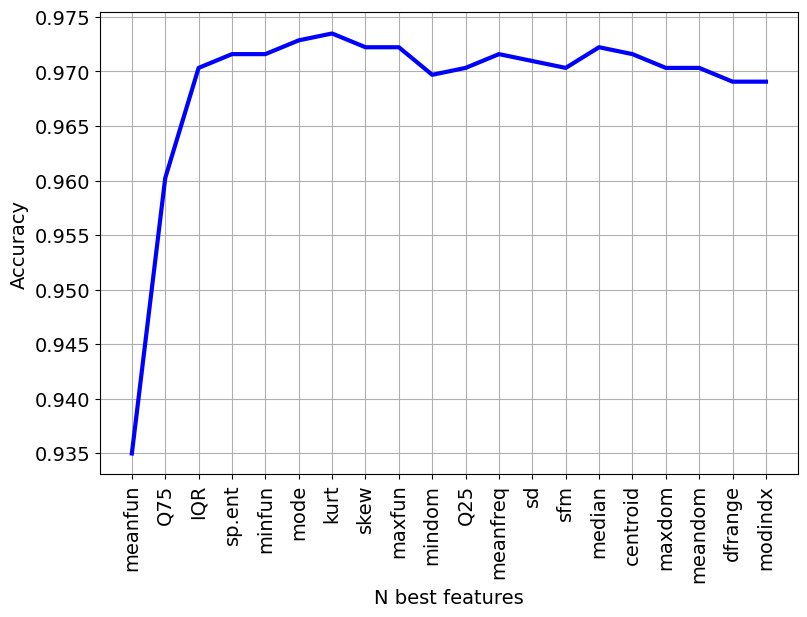

In [49]:
plt.figure(figsize=(9, 6))
plt.plot(n_best_names, n_best_accuracies, color='b', linewidth=3)
plt.xticks(n_best_features, size=14, rotation='vertical')
plt.xlabel("N best features", size=14)
plt.yticks(size=14)
plt.ylabel("Accuracy", size=14)
plt.grid()
plt.show()

We see that the accuracy is best when we select 7 features.

In [57]:
report = pd.DataFrame()
report['Name'] = n_best_names
report['Accuracy'] = n_best_accuracies
report

,Name,Accuracy
0,meanfun,0.934975
1,Q75,0.960227
2,IQR,0.970328
3,sp.ent,0.971591
4,minfun,0.971591
5,mode,0.972854
6,kurt,0.973485
7,skew,0.972222
8,maxfun,0.972222
9,mindom,0.969697


In [58]:
assert list(report['Name']) == ['meanfun', 'Q75', 'IQR', 'sp.ent', 'minfun', 'mode', 'kurt', 'skew', 'maxfun', 'mindom', 'Q25', 'meanfreq', 'sd', 'sfm', 'median', 'centroid', 'maxdom', 'meandom', 'dfrange', 'modindx']

# Task 4 (3 points)

Well, now let's use PCA. Plot the dependency of the classification accuracy from the number of components of PCA. Vary the number of components from 1 to 20. Do you have the same accuracies for one PCA component and for the first best feature from Task 1? How do you explain it?

In this task you can use PCA from sklearn

The output example:

In [61]:
from sklearn.decomposition import PCA

pca_components = np.arange(1, 21)
pca_accuracies = []

for n_components in range(1, 21):
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_train_new = pca.transform(X_train)
    X_test_new = pca.transform(X_test)
    clf.fit(X_train_new, y_train)
    y_pred = clf.predict(X_test_new)
    accuracy = accuracy_score(y_test, y_pred)
    pca_accuracies.append(accuracy)

pca_accuracies

[0.7146464646464646,
 0.8333333333333334,
 0.8345959595959596,
 0.8541666666666666,
 0.9116161616161617,
 0.9084595959595959,
 0.9015151515151515,
 0.8996212121212122,
 0.9116161616161617,
 0.9223484848484849,
 0.9103535353535354,
 0.9223484848484849,
 0.9210858585858586,
 0.9172979797979798,
 0.9210858585858586,
 0.9191919191919192,
 0.9223484848484849,
 0.9191919191919192,
 0.9160353535353535,
 0.9172979797979798]

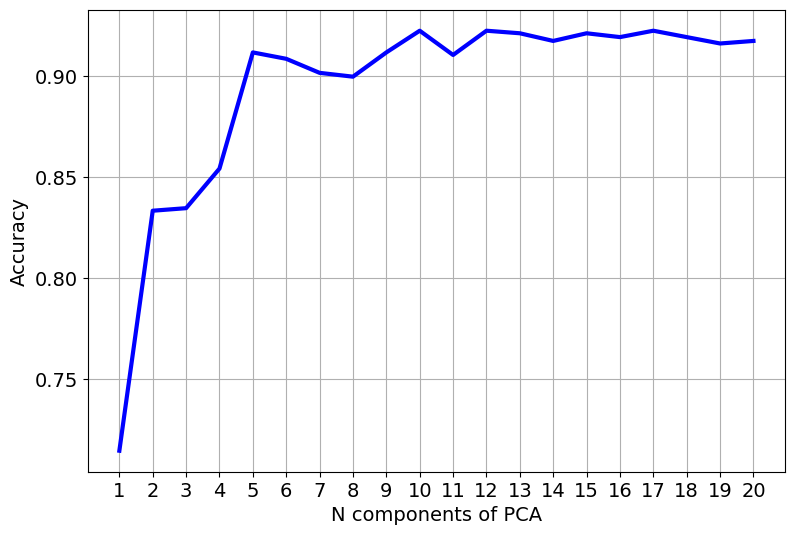

In [62]:
plt.figure(figsize=(9, 6))
plt.plot(pca_components, pca_accuracies, color='b', linewidth=3)
plt.xticks(pca_components, size=14)
plt.xlabel("N components of PCA", size=14)
plt.yticks(size=14)
plt.ylabel("Accuracy", size=14)
plt.grid()
plt.show()

We see that the accuracy for one PCA component is actually lower than for the best feature. It seems like we have more freedom when choosing PC 1 as we can choose any linear combination of features, not just one feature. However, in the first case, we were maximizing accuracy directly, while in PCA we are minimizing the squared distance between the chosen line and the sample points. So we may have chosen the line that fits best, however, the accuracy is not guaranteed to be high.

# Task 5 (2 points)

Plot explained variance and cumulative explained variance for the PCA at every number of components.

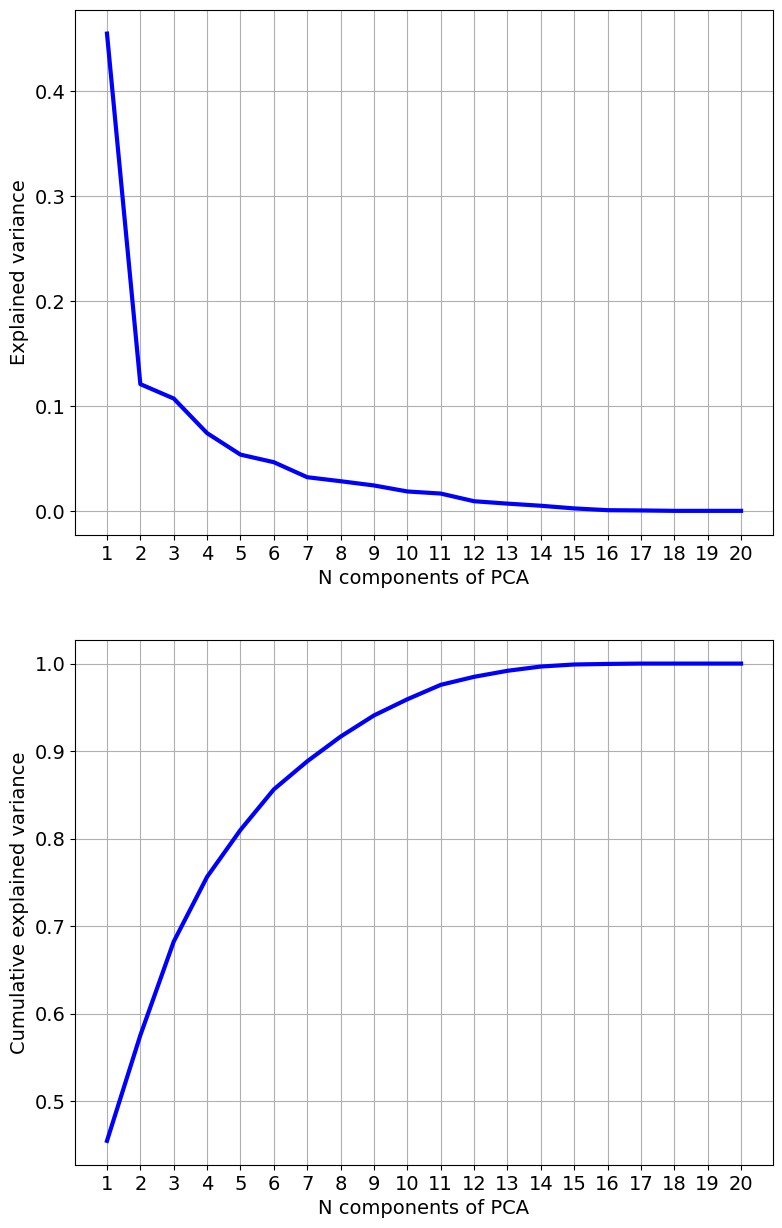

In [76]:
explained_variance = pca.explained_variance_ratio_
cummulative_explained_variance = np.cumsum(explained_variance)

fig, axs = plt.subplots(2, 1, figsize=(9, 15))

axs[0].plot(pca_components, explained_variance, color='b', linewidth=3)
axs[0].set_xticks(ticks=pca_components)
axs[0].tick_params(axis='both', which='major', labelsize=14)
axs[0].set_xlabel("N components of PCA", fontsize=14)
axs[0].set_ylabel("Explained variance", fontsize=14)
axs[0].grid()

axs[1].plot(pca_components, cummulative_explained_variance, color='b', linewidth=3)
axs[1].set_xticks(ticks=pca_components)
axs[1].tick_params(axis='both', which='major', labelsize=14)
axs[1].set_xlabel("N components of PCA", fontsize=14)
axs[1].set_ylabel("Cumulative explained variance", fontsize=14)
axs[1].grid()

We see that variance explained by each component falls, while the cummulative explained variens increases to 1.0, as expected.